In [1]:
#import csv
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

file= "dm_export_19900101_20201231.csv"

df=pd.read_csv(file,parse_dates=["MapDate"])
df["Year"]=df["MapDate"].dt.strftime('%Y')
df

,State,County,FIPS,MapDate,DSCI,Year
0,AZ,Apache County,4001,2000-01-04,43,2000
1,AZ,Apache County,4001,2000-01-11,100,2000
2,AZ,Apache County,4001,2000-01-18,100,2000
3,AZ,Apache County,4001,2000-01-25,100,2000
4,AZ,Apache County,4001,2000-02-01,100,2000
...,...,...,...,...,...,...
73427,WY,Uinta County,56041,2020-12-01,235,2020
73428,WY,Uinta County,56041,2020-12-08,235,2020
73429,WY,Uinta County,56041,2020-12-15,236,2020
73430,WY,Uinta County,56041,2020-12-22,236,2020


In [2]:
df_co=df.loc[df.State=="CO"]
df_co=df_co.drop(columns=["FIPS"])
df_co

,State,County,MapDate,DSCI,Year
19728,CO,Archuleta County,2000-01-04,0,2000
19729,CO,Archuleta County,2000-01-11,100,2000
19730,CO,Archuleta County,2000-01-18,100,2000
19731,CO,Archuleta County,2000-01-25,100,2000
19732,CO,Archuleta County,2000-02-01,100,2000
...,...,...,...,...,...
42739,CO,Summit County,2020-12-01,447,2020
42740,CO,Summit County,2020-12-08,447,2020
42741,CO,Summit County,2020-12-15,447,2020
42742,CO,Summit County,2020-12-22,447,2020


In [3]:
df_co_groups=df_co.groupby(["State","Year"]).mean()

In [4]:
df_co_groups.reset_index()

,State,Year,DSCI
0,CO,2000,58.170330
1,CO,2001,23.210623
2,CO,2002,344.516622
3,CO,2003,342.357143
4,CO,2004,206.083333
5,CO,2005,56.645604
6,CO,2006,95.032051
7,CO,2007,61.685897
8,CO,2008,16.552561
9,CO,2009,44.059524


In [5]:
df_co_groups=df_co_groups.groupby(["State","Year"]).mean().reset_index()
df_co_groups

,State,Year,DSCI
0,CO,2000,58.170330
1,CO,2001,23.210623
2,CO,2002,344.516622
3,CO,2003,342.357143
4,CO,2004,206.083333
5,CO,2005,56.645604
6,CO,2006,95.032051
7,CO,2007,61.685897
8,CO,2008,16.552561
9,CO,2009,44.059524


<AxesSubplot:xlabel='Year'>

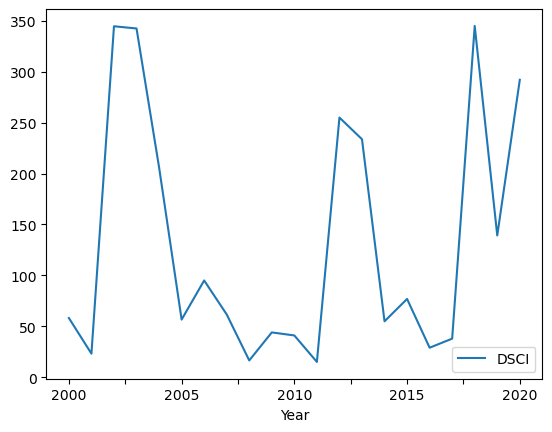

In [6]:
df_co_groups.plot(x="Year")

In [7]:
df_co_county_groups=df_co.groupby(["County","Year"]).mean().reset_index()
df_co_county_groups

,County,Year,DSCI
0,Archuleta County,2000,58.442308
1,Archuleta County,2001,16.942308
2,Archuleta County,2002,374.320755
3,Archuleta County,2003,368.192308
4,Archuleta County,2004,150.807692
...,...,...,...
436,Summit County,2016,28.903846
437,Summit County,2017,27.980769
438,Summit County,2018,193.403846
439,Summit County,2019,83.377358


In [8]:
county_list=df_co["County"].unique()
county_list

array(['Archuleta County', 'Delta County', 'Dolores County',
       'Eagle County', 'Garfield County', 'Grand County',
       'Gunnison County', 'Hinsdale County', 'La Plata County',
       'Mesa County', 'Moffat County', 'Montezuma County',
       'Montrose County', 'Ouray County', 'Pitkin County',
       'Rio Blanco County', 'Routt County', 'Saguache County',
       'San Juan County', 'San Miguel County', 'Summit County'],
      dtype=object)

Archuleta County
Delta County
Dolores County
Eagle County
Garfield County
Grand County
Gunnison County
Hinsdale County
La Plata County
Mesa County
Moffat County
Montezuma County
Montrose County
Ouray County
Pitkin County
Rio Blanco County
Routt County
Saguache County
San Juan County
San Miguel County
Summit County


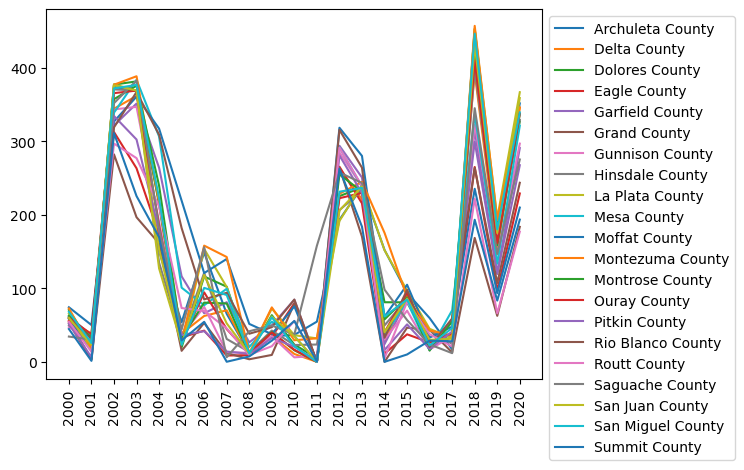

In [9]:
for county in county_list:
    print(county)
    df_co_map=df_co_county_groups.loc[df_co_county_groups["County"]==county]
    df_co_map=df_co_map.drop(columns=["County"])
    df_co_map=df_co_map.rename(columns={"DSCI": county + " DSCI "})
    x2=df_co_map["Year"].to_list()
    y2=df_co_map[county + " DSCI "].to_list()
    plt.plot(x2,y2,label=county)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()